# Parsing and Analyzing Language Model Evaluation Data

@Author Atlas Berk Polat

In [1]:
# Import necessary libraries
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

## Loading the JSON Data

We'll read the data from the JSONL file and parse each line as a separate JSON object.

In [10]:
# Path to the JSONL file
jsonl_path_list = ['samples_yks_2024_2025-05-06T12-46-26.910120.jsonl',
                     'samples_yks_2024_2025-05-06T13-25-36.676765.jsonl']

# Initialize an empty list to store the parsed data

big_data_list = []
 
for jsonl_path in jsonl_path_list:


    # Read the JSONL file and parse each line
    with open(jsonl_path, 'r', encoding='utf-8') as file:
        for line in file:
            try:
                # Parse each line as a JSON object
                data = json.loads(line.strip())
                data["file_name"] = jsonl_path
                big_data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON: {e}")

    print(f"Successfully loaded {len(data_list)} records from the JSONL file.")

    



Successfully loaded 291 records from the JSONL file.
Successfully loaded 291 records from the JSONL file.


## Converting to DataFrame



In [12]:
# Function to flatten the nested structure
def flatten_data(data_item):
    flattened = {
        'file_name': data_item.get('file_name'),
        'doc_id': data_item.get('doc_id'),
        'section': data_item.get('doc', {}).get('section'),
        'question_number': data_item.get('doc', {}).get('question_number'),
        #'page': data_item.get('data').get('doc', {}).get('page'),
        #'question': data_item.get('doc', {}).get('question'),
        'has_image': data_item.get('doc', {}).get('has_image'),
        #'passage': data_item.get('doc', {}).get('passage'),
        'target': data_item.get('target'),
        'acc': data_item.get('acc'),
    }
    


    
    return flattened

# Flatten each item in the list
flattened_data = [flatten_data(item) for item in big_data_list ]

# Create a DataFrame
df = pd.DataFrame(flattened_data)

# Display the first few rows
df.head()

,file_name,doc_id,section,question_number,has_image,target,acc
0,samples_yks_2024_2025-05-06T12-46-26.910120.jsonl,0,TURK-DILI-VE-EDEBIYATI-SOSYAL-BILIMLER-1-TESTI,1,False,1,1.0
1,samples_yks_2024_2025-05-06T12-46-26.910120.jsonl,1,TURK-DILI-VE-EDEBIYATI-SOSYAL-BILIMLER-1-TESTI,2,False,4,1.0
2,samples_yks_2024_2025-05-06T12-46-26.910120.jsonl,2,TURK-DILI-VE-EDEBIYATI-SOSYAL-BILIMLER-1-TESTI,3,False,1,1.0
3,samples_yks_2024_2025-05-06T12-46-26.910120.jsonl,3,TURK-DILI-VE-EDEBIYATI-SOSYAL-BILIMLER-1-TESTI,4,False,3,1.0
4,samples_yks_2024_2025-05-06T12-46-26.910120.jsonl,4,TURK-DILI-VE-EDEBIYATI-SOSYAL-BILIMLER-1-TESTI,5,False,2,1.0


Choosing questions with no images

In [17]:
question_without_image = df[(df['has_image'] == False)]

question_without_image.describe()

,doc_id,question_number,acc
count,452.000000,452.000000,452.000000
mean,134.500000,19.672566,0.685841
std,82.702965,11.686931,0.464694
min,0.000000,1.000000,0.000000
25%,63.000000,10.000000,0.000000
50%,138.500000,19.000000,1.000000
75%,202.000000,29.000000,1.000000
max,288.000000,46.000000,1.000000


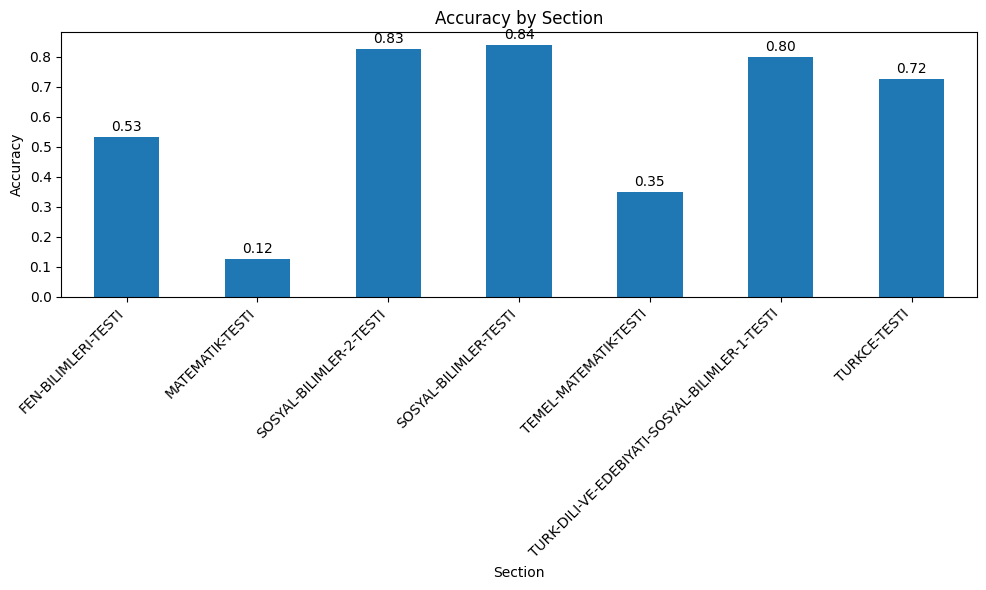

In [29]:
df.groupby('section')['acc'].mean().plot(kind='bar', figsize=(10, 6), title='Accuracy by Section')

# Add value labels on top of bars
for i, v in enumerate(df.groupby('section')['acc'].mean()):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')

plt.ylabel('Accuracy')

plt.xlabel('Section')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
